In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# pd.set_option(display.max_rows, None)
# pd.set_option(display.max_columns, None)

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# url titanic

file_id = '1g9ngmQzobOc-8pBO5N1s86tZe2cuBwkt'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1, inplace=True)

In [89]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
164,0,3,male,1.0,4,1,S
399,1,2,female,28.0,0,0,S
352,0,3,male,15.0,1,1,C
256,1,1,female,NaN,0,0,C
86,0,3,male,16.0,1,3,S


In [90]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [91]:
age_median = df['Age'].median()

df['Age'].fillna(age_median, inplace=True)

In [92]:
df['Age'].isnull().sum()

0

In [93]:
embarked_mode = df['Embarked'].mode()[0]

df['Embarked'].fillna(embarked_mode, inplace=True)

In [94]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [95]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [96]:
# Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.

#  one hot encoding -> get dummies -> making new columns with 0 or 1

# label encoding -> converting each value in categorical col given to a number

# orinal or integer encoding -> each unique category value is assigned an integer value.

In [97]:
df = pd.get_dummies(df, columns =['Sex', 'Embarked'])

In [98]:
df.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
400,1,3,39.0,0,0,0,1,0,0,1
878,0,3,28.0,0,0,0,1,0,0,1
242,0,2,29.0,0,0,0,1,0,0,1
195,1,1,58.0,0,0,1,0,1,0,0
646,0,3,19.0,0,0,0,1,0,0,1


In [99]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [100]:
# logistic regression (binary or 2 outcomes only...yes or no | 0 or 1)

In [101]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived'], axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [102]:
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)*100

80.44692737430168

In [103]:
# metrics

In [104]:
from sklearn.metrics import accuracy_score

predictions = reg.predict(X_test)
accuracy_score(Y_test, predictions)

0.8044692737430168

In [105]:
from sklearn import metrics

print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [106]:
# confusion matrix

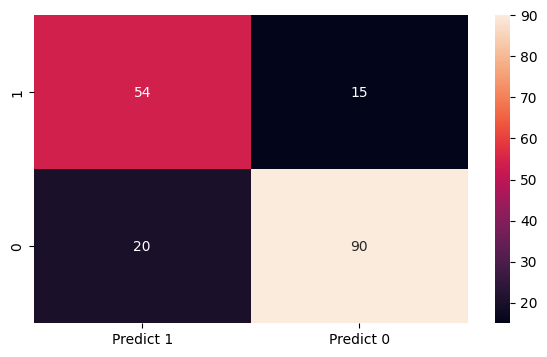

In [107]:
cm = metrics. confusion_matrix(Y_test, predictions, labels=[1, 0] )

df_cm = pd.DataFrame(cm, index = [i for i in [1, 0]] , columns= [i for i in ['Predict 1', 'Predict 0']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)
plt.show()

In [108]:
# naive bayes algo

In [109]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.score(X_test, Y_test)

0.7988826815642458

In [110]:
# Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 0)

In [113]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.score(X_test, Y_test)

0.7988826815642458